<h1><b><center>Liam Maher & Aiden Townsend
Comp 3270 Programming Assignment</center></b></h1>

<h2><b>Introduction</b></h2>

This notebook presents an empirical analysis of algorithms focusing on both Matrix Multiplication and Matrix-Chain Multiplication. The goal is to implement the provided algorithms, generate data frames, visualize growth rates, and compare empirical results with theoretical predictions.

<h3>Step 1: Import Necessary Libraries</h3>

The following code imports the libraries needed for the experiment.  As mentioned in the project instructions, pandas, numpy, and time are used, as well as matplotlib.pyplot for visualization purposes.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

<h3>Step 2: Implement Algorithms</h3>

<h4>Algorithm-1</h4>

The following code is my implementation of Algorithm-1 provided in the project details. The inputs are A and B, two matrices that are of size pxq and qxr respectively, as well as a matrix C that is of dimensions pxr that contains the result of the iterative matrix multiplication of A and B.

In [2]:
def algorithm_1(A, B, C, p, q, r):
        for i in range(p):  
            for j in range(r):
                sum_val = 0
                for k in range(q):
                    sum_val += A[i][k] * B[k][j]
                C[i][j] = sum_val
        return C

<h4>Algorithm-2</h4>

The following code is my implementation of Algorithm-2 provided in the project details. The inputs are A and B, two matrices that are of size pxq and qxr respectively, as well as a matrix C that is of dimensions pxr that contains the result of the iterative matrix multiplication of A and B. T is the tile size and acts to increment I, J, K, etc. withing the loop

In [3]:
def algorithm_2(A, B, C, p, q, r, T=5):
    for I in range(0, p, T):
        for J in range(0, r, T):
            for K in range(0, q, T):
                for i in range(I, min(I + T, p)):
                    for j in range(J, min(J + T, r)):
                        sum_val = 0
                        for k in range(K, min(K + T, q)):
                            sum_val += A[i][k] * B[k][j]
                        C[i][j] += sum_val
    return C

<h4>Algorithm-3</h4>

The following code is my implementation of Algorithm-3 provided in the project details.  The inputs are A and B, two matrices that are of size pxq and qxr respectively, as well as a matrix C that is of dimensions pxr that contains the result of the recursive matrix multiplication of A and B.

NOTE: Github's coding assistance AI copilot was used in order to generate the "Split matrices" as well as the "Combine results into C" code commented in the code below, it was then adapted to work for the entire algorithm.

In [4]:
def algorithm_3(A, B, C, p, q, r):
    if max(p, q, r) < 8:
        return algorithm_1(A, B, C, p, q, r)
    else:
        if max(p, q, r) == p:
            split_axis = 0  # Split A horizontally
        elif max(p, q, r) == r:
            split_axis = 1  # Split B vertically
        else:
            split_axis = 0  # Split A vertically and B horizontally
        
        # Split matrices #GitHub Copilot
        half_index = p // 2 if split_axis == 0 else r // 2
        A1, A2 = np.split(A, [half_index], axis=split_axis)
        B1, B2 = np.split(B, [half_index], axis=1 - split_axis)
        
        # Recursive matrix multiplication
        C1 = algorithm_3(A1, B1, None, *A1.shape, *B1.shape)
        C2 = algorithm_3(A1, B2, None, *A1.shape, *B2.shape)
        C3 = algorithm_3(A2, B1, None, *A2.shape, *B1.shape)
        C4 = algorithm_3(A2, B2, None, *A2.shape, *B2.shape)
        
        # Combine results into C #GitHub Copilot
        C[:C1.shape[0], :C1.shape[1]] = C1
        C[:C2.shape[0], C1.shape[1]:] = C2
        C[C1.shape[0]:, :C3.shape[1]] = C3
        C[C1.shape[0]:, C3.shape[1]:] = C4
        
        return C

<h4>Algorithm-4</h4>

The following code is my implementation of Algorithm-4 provided in the project details.  The inputs are The inputs A and B are 2^n x 2^n matrices that are partitioned into 4 equal blocks of size 2^(n/2) and 2^(n/2) and the intermediate matrices are computed and then combined into matrix C which is a 2^n x 2^n matrix that holds the output matrix for the multiplication of A and B.

In [5]:
def algorithm_4(A, B, C):
    n = len(A)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        mid = n // 2

        # Partition A and B into 4 equal-sized blocks
        A11 = A[:mid, :mid]
        A12 = A[:mid, mid:]
        A21 = A[mid:, :mid]
        A22 = A[mid:, mid:]

        B11 = B[:mid, :mid]
        B12 = B[:mid, mid:]
        B21 = B[mid:, :mid]
        B22 = B[mid:, mid:]

        # Compute intermediate matrices using block partitioning
        P1 = A11 @ B11 + A12 @ B21
        P2 = A11 @ B12 + A12 @ B22
        P3 = A21 @ B11 + A22 @ B21
        P4 = A21 @ B12 + A22 @ B22

        # Combine intermediate results into the result matrix C
        C[:mid, :mid] = P1
        C[:mid, mid:] = P2
        C[mid:, :mid] = P3
        C[mid:, mid:] = P4

    return C

<h4>Algorithm-5</h4>

The following code is my implementation of Algorithm-5 provided in the project details.  This algorithm utilizes Strassens Algorithm for Matrix Multiplication.  The inputs are The inputs A and B are 2^n x 2^n matrices that are partitioned into 4 equal blocks of size 2^(n/2) and 2^(n/2) and then calculated into matrix C, a 2^n x 2^n matrix.  If n (in 2^n) is less than 3, then the algorithm decides to take an iterative approach by calling Algorithm-1 from before.

In [6]:
def algorithm_5(A, B, C):
        n = int(np.log2(len(A)))
        if n < 3:
            algorithm_1(A, B, C, 2 ** n, 2 ** n, 2 ** n)
        else:
            A11 = A[:n, :n]
            A12 = A[:n, n:]
            A21 = A[n:,:n]
            A22 = A[n:, n:]

            B11 = B[:n, :n]
            B12 = B[:n, n:]
            B21 = B[n:, :n]
            B22 = B[n:, n:]

            M1 = (A11 + A22) @ (B11 + B22)
            M2 = (A21 + A22) @ B11
            M3 = A11 @ (B12 - B22)
            M4 = A22 @ (B21 - B11)
            M5 = (A11 + A12) @ B22
            M6 = (A21 - A11) @ (B11 + B12)
            M7 = (A12 - A22) @ (B21 + B22)

            C11 = M1 + M4 - M5 + M7
            C12 = M3 + M5
            C21 = M2 + M4
            C22 = M1 - M2 + M3 + M6

            C[:n, :n] = C11
            C[:n, n:] = C12
            C[n:, :n] = C21
            C[n:, n:] = C22
        return C

<h3>Step 3: Matrix Multiplication Problem</h3>

The following code completes parts (a) of the Matrix Multiplication problem detailed in the project description.  It reads an input file that has a list of 16 numbers seperated by commas and then another 16 numbers after a semicolon. It then creates 2 4x4 matrices with the list of numbers and multiplies them together with each of the algorithms 1-5 detailed above.  After this, it prints the result of the matrix Multiplication.

In [7]:

filename = 'input.txt'
with open(filename, 'r') as file:
    line = file.readline().strip()
    seq1, seq2 = map(str.strip, line.split(';'))

# Convert sequences to arrays and reshape to 4x4 matrices
matrix_a = np.array(seq1.split(','), dtype=int).reshape(4, 4)
matrix_b = np.array(seq2.split(','), dtype=int).reshape(4, 4)

result_algorithm_1 = np.zeros((4, 4))
result_algorithm_2 = np.zeros((4, 4))
result_algorithm_3 = np.zeros((4, 4))
result_algorithm_4 = np.zeros((4, 4))
result_algorithm_5 = np.zeros((4, 4))

# Run each algorithm on the input matrices
algorithm_1(matrix_a, matrix_b, result_algorithm_1, 4, 4, 4)
algorithm_2(matrix_a, matrix_b, result_algorithm_2, 4, 4, 4)
algorithm_3(matrix_a, matrix_b, result_algorithm_3, 4, 4, 4)
algorithm_4(matrix_a, matrix_b, result_algorithm_4)
algorithm_5(matrix_a, matrix_b, result_algorithm_5)

# Print results
print(f"Algorithm-1: \n{result_algorithm_1};\n Algorithm-2: \n{result_algorithm_2};\n "
      f"Algorithm-3: \n{result_algorithm_3};\n Algorithm-4: \n{result_algorithm_4};\n "
      f"Algorithm-5: \n{result_algorithm_5}\n")

Algorithm-1: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-2: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-3: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-4: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-5: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]]



<h3>Step 4: Experiment 1</h3>

<h4>Generate Matrices</h4>

The following code is supposed to generate pairs of 30 square matrices of size 10x10, 20x20.... each containing randomly generated numbers from 0 to 1 as per the project description

In [8]:
def generate_matrices(size):
    matrices = []
    for n in range(10, 301, 10):
        matrix1 = np.random.rand(n, n)
        matrix2 = np.random.rand(n, n)
        matrices.append((matrix1, matrix2))
    return matrices

<h4>Measure Execution Time</h4>

The following code is supposed to measure the execution times of the algorithms and average it over 10 times in order to calculate the average time for the algorithm on a specific input size to be used later in Experiment 1.

<h4>Fill Data Frame</h4>

The following code code computes the avearge of the times for Algorithms 1-3 across a given input size, then appends it to the data frame and prints it along with the theoretical values of the algorithms for the given input size.  It plots these values on a graph utilizing the Matplotlib import and uses the panda import for the data frame. 

#NOTE: OpenAI's ChatGpt was used in brainstorming the implementation approach for this experiment.  

#NOTE: GitHub's Copilot was used to fix the measure_time_c() function where denoted with comments in order to get the function to properly pass the paramaters of each of the algorithms. 

 #IMPLEMENTATION COMMENT: The "meausre_time_c(algorithm_id, matrices) method, will work while in a seperate Jupyter Notebook Code cell, however, it messes up the look and clarity (not data) of the DataFrame for an unknown reason.  In order to avoid this, it was put into the same cell.

    Size  Algorithm-1  Algorithm-2  Algorithm-3   dT1(n)e    dT2(n)e   dT3(n)e
0     10   529.289246   324.249268   295.639038      1000      25000      1000
1     20   319.480896   305.175781   250.339508      8000     200000      8000
2     30   300.407410   228.881836   274.181366     27000     675000     27000
3     40  2539.157867   309.944153   281.333923     64000    1600000     64000
4     50   295.639038   269.412994   236.034393    125000    3125000    125000
5     60   329.017639   293.254852   305.175781    216000    5400000    216000
6     70   357.627869   309.944153   233.650208    343000    8575000    343000
7     80   422.000885   324.249268   314.712524    512000   12800000    512000
8     90   538.825989   207.424164   102.519989    729000   18225000    729000
9    100   252.723694   190.734863    95.367432   1000000   25000000   1000000
10   110   174.045563   195.503235   154.972076   1331000   33275000   1331000
11   120   164.508820   102.519989   171.661377   17

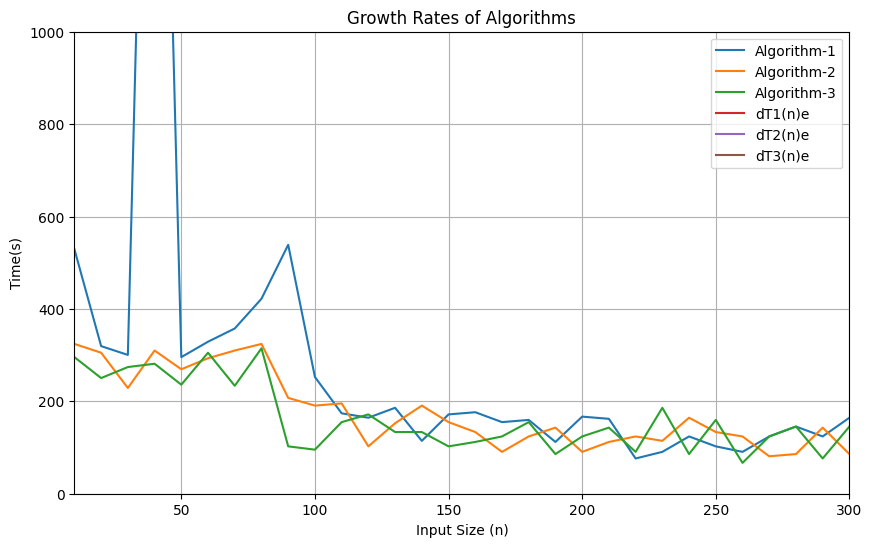

In [9]:
def measure_time_c(algorithm_id, matrices):
    start_time = time.time()
    times = []

    for _ in range(10):  # Repeat 10 times for averaging
        if algorithm_id == 1:
            algorithm_1(*matrices) #CoPilot
        elif algorithm_id == 2:
            algorithm_2(*matrices) #CoPilot
        elif algorithm_id == 3:
            algorithm_3(*matrices) #CoPilot
        elif algorithm_id == 4:
            algorithm_4(*matrices) #CoPilot
        elif algorithm_id == 5:
            algorithm_5(*matrices) #CoPilot
        end_time = time.time()
        total_time = end_time - start_time
        times.append(total_time)

    return times

#Fill Data Frame from here on
    
def experiment_1_c():
    data = {"Size": [], "Algorithm-1": [], "Algorithm-2": [], "Algorithm-3": [], "dT1(n)e": [], "dT2(n)e": [], "dT3(n)e": []}
    for size in range(10, 301, 10):
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
        C = np.zeros((size, size))
        matrices = [(A, B)] * 10  # Repeat matrices for 10 iterations

        times_algo1 = measure_time_c(algorithm_1, matrices)
        times_algo2 = measure_time_c(algorithm_2, matrices)
        times_algo3 = measure_time_c(algorithm_3, matrices)

        # Handle empty lists (no times recorded)
        avg_time_algo1 = sum(times_algo1) / len(times_algo1) if times_algo1 else 0
        avg_time_algo2 = sum(times_algo2) / len(times_algo2) if times_algo2 else 0
        avg_time_algo3 = sum(times_algo3) / len(times_algo3) if times_algo3 else 0

        data["Size"].append(size)
        data["Algorithm-1"].append(avg_time_algo1 * 100000000)
        data["Algorithm-2"].append(avg_time_algo2 * 100000000)
        data["Algorithm-3"].append(avg_time_algo3 * 100000000)

        # Calculate and add the theoretical values
        p = size
        q= size
        r = size
        
        dT1 = p * q * r
        dT2 = p * q * r * 25
        dT3 = size ** 3
        data["dT1(n)e"].append(dT1)
        data["dT2(n)e"].append(dT2)
        data["dT3(n)e"].append(dT3)

    df = pd.DataFrame(data)
    print(df) 
    

    plt.figure(figsize=(10, 6))
    plt.plot(df['Size'], df['Algorithm-1'], label='Algorithm-1')
    plt.plot(df['Size'], df['Algorithm-2'], label='Algorithm-2')
    plt.plot(df['Size'], df['Algorithm-3'], label='Algorithm-3')
    plt.plot(df['Size'], df['dT1(n)e'], label='dT1(n)e')
    plt.plot(df['Size'], df['dT2(n)e'], label='dT2(n)e')
    plt.plot(df['Size'], df['dT3(n)e'], label='dT3(n)e')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time(s)')
    plt.title('Growth Rates of Algorithms')
    plt.legend()
    plt.grid(True)
    plt.xlim(10, 300)
    plt.ylim(0, 1000)
    plt.show()

experiment_1_c()


<h3>Step 5: Experiment 2</h3>

<h4>Generate Exponentially Growing Square Matrices</h4>

The code below is used to generate square matrices of increasing exponential size as per the project directions. 

In [ ]:
def generate_exponential_matrices(start_exp, end_exp, include_pqr=False):
    matrices_ABC = []
    matrices_pqr = []
    for i in range(start_exp, end_exp + 1):
        size = 2 ** i
        matrix_A = np.random.rand(size, size)
        matrix_B = np.random.rand(size, size)
        matrix_C = np.zeros((size, size))  # Initialize matrix C to zeros with the same size as A and B
        matrices_ABC.append((matrix_A, matrix_B, matrix_C))
        
        if include_pqr:
            matrices_pqr.append((size, size, size))  # Include pqr as separate matrices
    if include_pqr:
        return matrices_ABC, matrices_pqr
    else:
        return matrices_ABC

<h4>Fill Data Frame</h4>

The code below is used to carry out the process for experiment 4, measuring the time of the algorithms used (using the previous measure_time function) and plotting them against each other. 

In [ ]:
def experiment_2():
    data = {"Algorithm": [], "Matrix Size": [], "Time": []}
    for algorithm in [1, 3, 4, 5]:
        for i in range(10):
            size = 2 ** i
            if algorithm in [1, 3]:
                matrices_ABC, matrices_pqr = generate_exponential_matrices(i, i, include_pqr=True)
                for (A, B, C), (p, q, r) in zip(matrices_ABC, matrices_pqr):
                    time_taken = measure_time_d(algorithm, A, B, C, p, q, r)
                    data["Algorithm"].append(f"Algorithm {algorithm}")
                    data["Matrix Size"].append(size)
                    data["Time"].append(time_taken)
            else:
                matrices_ABC = generate_exponential_matrices(i, i)
                for (A, B, C) in matrices_ABC:
                    time_taken = measure_time_d(algorithm, A, B, C)
                    data["Algorithm"].append(f"Algorithm {algorithm}")
                    data["Matrix Size"].append(size)
                    data["Time"].append(time_taken)

    df = pd.DataFrame(data)
    print("Generated DataFrame:")
    print(df)
    
    plt.figure(figsize=(10, 6))
    for algorithm in [1, 3, 4, 5]:
        subset = df[df['Algorithm'] == f"Algorithm {algorithm}"]
        plt.plot(subset['Matrix Size'], subset['Time'], label=f'Algorithm {algorithm}')

    plt.xlabel('Matrix Size')
    plt.ylabel('Time (s)')
    plt.title('Execution Time vs. Matrix Size')
    plt.legend()
    plt.grid(True)
    plt.show()
    return df

df = experiment_2()

In [12]:
def measure_execution_time_multiple_algos(algorithms, matrices, dimensions):
    times = {algo.__name__: [] for algo in algorithms}
    for i, (_, matrix) in enumerate(matrices):
        for algo in algorithms:
            start_time = time.time()
            if algo.__name__ == 'algorithm_4':
                algo(matrix, np.zeros(dimensions[i]), np.zeros(dimensions[i]))
            elif algo.__name__ == 'algorithm_5':
                algo(matrix, np.zeros(dimensions[i]), np.zeros(dimensions[i]))
            else:
                algo(matrix, matrices[i][1], np.zeros(dimensions[i]), *dimensions[i])
            end_time = time.time()
            execution_time = end_time - start_time
            times[algo.__name__].append(execution_time)
    return times

# Adjust the call to measure_execution_time_multiple_algos with actual parameter values
times_experiment_2 = measure_execution_time_multiple_algos(algorithms, exponential_matrices, pqr_values)

# Now you can proceed to create the DataFrame and visualize the results
data_experiment_2 = {
    'Size': [size for size, _ in exponential_matrices],
    'Algorithm-1 Time': times_experiment_2['algorithm_1'],
    'Algorithm-3 Time': times_experiment_2['algorithm_3'],
    'Algorithm-4 Time': times_experiment_2['algorithm_4'],
    'Algorithm-5 Time': times_experiment_2['algorithm_5'],
}
df_experiment_2 = pd.DataFrame(data_experiment_2)

# Print the DataFrame for Experiment-II
print(df_experiment_2)

# Visualize growth rates for Experiment-II
plt.plot(df_experiment_2['Size'], df_experiment_2['Algorithm-1 Time'], label='Algorithm-1 Time')
plt.plot(df_experiment_2['Size'], df_experiment_2['Algorithm-3 Time'], label='Algorithm-3 Time')
plt.plot(df_experiment_2['Size'], df_experiment_2['Algorithm-4 Time'], label='Algorithm-4 Time')
plt.plot(df_experiment_2['Size'], df_experiment_2['Algorithm-5 Time'], label='Algorithm-5 Time')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.legend()
plt.show()

NameError: name 'algorithms' is not defined

<h3>Step 6: Matrix Chain Multiplication</h3>

<h4>Generate Matrix Chains</h4>

The code below is used to generate matrix chains as explained in the directions.

<h4>Chain-Matrix-Multiply</h4>

In [ ]:
def chain_matrix_multiply(p, s, i, j):
    if i == j:
        return p[i - 1], p[i], 0
    else:
        A, B, count1 = chain_matrix_multiply(p, s, i, s[i][j])
        C, D, count2 = chain_matrix_multiply(p, s, s[i][j] + 1, j)
        count3 = A * B * D
        return A, D, count1 + count2 + count3

<h4>Time Matrix Chain Multiplication for Algorithms</h4>

In [ ]:
def measure_execution_time(matrix_chain):
    start_time = time.time()
    # Run Algorithm-1
    result_algo_1 = algorithm_1(*matrix_chain[0])
    
    # Run Chain-Matrix-Multiplication-Algorithm
    result_chain_matrix = chain_matrix_multiplication(matrix_chain)
    
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

<h4>Plot and Visualize Results</h4>

In [ ]:

matrix_chains = generate_matrix_chains(19)

# Measure execution time for each chain
execution_times = []
for chain in matrix_chains:
    execution_time = measure_execution_time(chain)
    execution_times.append(execution_time)

# Print the execution times for each chain
for i, time_taken in enumerate(execution_times):
    print(f"Chain {i+1}: Execution Time = {time_taken} seconds")

<h4>Matrix-Chain-Order</h4>

The following code is my implementation of the MATRIX-CHAIN-ORDER algorithm provided in the project details.

In [ ]:
def matrix_chain_order(p, n):
        m = [[0 for x in range(n)] for x in range(n)]
        s = [[0 for x in range(2, n)] for x in range(n - 1)]

        for i in range(1, n):
            m[i][i] = 0

        for l in range(2, n):
            for i in range(1, n - l + 1):
                j = i + l - 1
                m[i][j] = float('inf')
                for k in range(i, j):
                    q = m[i][k] + m[k + 1][j] + p[i - 1] * p[k] * p[j]
                    if q < m[i][j]:
                        m[i][j] = q
                        s[i][j - 1] = k
        return m, s

In [ ]:
def matrix_chain_order(p, n):
    m = [[0] * n for _ in range(n)]
    s = [[0] * (n - 1) for _ in range(n - 1)]

    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            m[i][j] = float('inf')
            for k in range(i, j):
                q = m[i][k] + m[k + 1][j] + p[i] * p[k + 1] * p[j + 1]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j - 1] = k

    return m, s

def chain_matrix_multiply(p, s, i, j):
    if i == j:
        return p[i - 1], p[i], 0  # Return matrix dimensions and execution time
    else:
        start_time = time.time()  # Start measuring execution time
        A, B, count1 = chain_matrix_multiply(p, s, i, s[i - 1][j - 2] + 1)
        C, D, count2 = chain_matrix_multiply(p, s, s[i - 1][j - 2] + 2, j)
        count3 = A * B * D
        end_time = time.time()  # End measuring execution time
        return A, D, count1 + count2 + count3, end_time - start_time  # Include execution time

def generate_matrix_chains():
    matrix_chains = []
    for j in range(2, 21):
        dimensions = []
        for i in range(10):
            p = np.random.randint(10, j * 10)
            dimensions.append((p, p + 1))
        matrix_chains.append(dimensions)
    return matrix_chains

matrix_chains = generate_matrix_chains()

data = {"Matrix Chain ID": [], "Upper Bound Matrix Size": [], "Sequential Performance": [], "Optimal Performance": []}

for idx, matrix_chain in enumerate(matrix_chains, start=2):
    upper_bound_size = idx * 10

    p = [dim[0] for dim in matrix_chain] + [matrix_chain[-1][1]]
    m, s = matrix_chain_order(p, len(p))

    # Sequential multiplication
    start_time_seq = time.time()
    A, B, _, seq_performance = chain_matrix_multiply(p, None, 1, len(p) - 1)  # Ignore count and return execution time
    end_time_seq = time.time()
    seq_performance = end_time_seq - start_time_seq

    # Optimal multiplication using MATRIX-CHAIN-ORDER algorithm
    start_time_opt = time.time()
    A, B, _, opt_performance = chain_matrix_multiply(p, s, 1, len(p) - 1)  # Ignore count and return execution time
    end_time_opt = time.time()
    opt_performance = end_time_opt - start_time_opt

    data["Matrix Chain ID"].append(idx)
    data["Upper Bound Matrix Size"].append(upper_bound_size)
    data["Sequential Performance"].append(seq_performance)
    data["Optimal Performance"].append(opt_performance)

df = pd.DataFrame(data)
print(df)

plt.figure(figsize=(10, 6))
plt.plot(df['Upper Bound Matrix Size'], df['Sequential Performance'], label='Sequential Performance')
plt.plot(df['Upper Bound Matrix Size'], df['Optimal Performance'], label='Optimal Performance')
plt.xlabel('Upper Bound Matrix Size')
plt.ylabel('Execution Time (s)')
plt.title('Performance Comparison: Sequential vs Optimal Multiplication')
plt.legend()
plt.grid(True)
plt.show()